# Investigar  que celular debería ser rango de precio

Dado un conjunto de ejemplos de entrenamiento (de muestras) podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte.

- Support vector machine

### Autores
   * Efrén Jiménez

## Análisis del Problema

Bob ha iniciado su propia empresa de telefonía móvil. Quiere dar una dura batalla a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que crea su empresa. En este competitivo mercado de la telefonía móvil, no se pueden simplemente asumir cosas. Para solucionar este problema, recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere averiguar alguna relación entre las características de un teléfono móvil (por ejemplo: - RAM, memoria interna, etc.) y su precio de venta. Pero no es tan bueno en Machine Learning. Entonces necesita tu ayuda para resolver este problema.

En este problema, no tiene que predecir el precio real, sino un rango de precios que indica qué tan alto es el precio.

![blackbell](https://storage.googleapis.com/kaggle-datasets-images/11167/15520/cbfa0237b28059c7a20ed6ac3daf8b3c/dataset-cover.jpg?t=2018-01-28-09-11-09)

### Librerías

In [ ]:
!pip install numpy
!pip install pandas

In [82]:
import warnings
warnings.filterwarnings('ignore')
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import missingno as msno 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


## Entendimiento de los Datos

El total es de 2000 registro con 21 columnas dentro del set de datos de entrenamiento

- battery_power,
- blue,
- clock_speed,
- dual_sim,
- fc,
- four_g,
- int_memory,
- m_dep,
- mobile_wt,
- n_cores,
- pc,
- px_height
- ,px_width
- ,ram
- ,sc_h
- ,sc_w,
- talk_time,
- three_g,
- touch_screen,
- wifi,
- price_range

In [2]:
#Cargar los datos
train = pd.read_csv(r"data/train.csv")
test = pd.read_csv(r"data/test.csv")

In [3]:
#Primeros registros
train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
#Primeros registros
test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [5]:
#Describir dataset
train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [6]:
#Describir dataset
test.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [7]:
#Información del dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# Numero de registros del dataset
print("Cantidad de registros:",len(train))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(train.columns))
# Tipos de datos del dataset
print("Tipo de datos:",train.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",train.shape)

Cantidad de registros: 2000
Cantidad de columnas: 21
Tipo de datos: [dtype('int64') dtype('float64')]
Filas y columnas: (2000, 21)


In [9]:
# Numero de registros del dataset
print("Cantidad de registros:",len(test))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(test.columns))
# Tipos de datos del dataset
print("Tipo de datos:",test.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",test.shape)

Cantidad de registros: 1000
Cantidad de columnas: 21
Tipo de datos: [dtype('int64') dtype('float64')]
Filas y columnas: (1000, 21)


In [10]:
# Chekear valores nulos
print(train.isnull().any().sum(), ' / ', len(train.columns))

0  /  21


In [11]:
# Chekear valores nulos
print(test.isnull().any().sum(), ' / ', len(test.columns))

0  /  21


In [12]:
#Cuales columnnas estas con valores nulos
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [13]:
#Cuales columnnas estas con valores nulos
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

In [14]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
train=train.dropna() 

In [15]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
test=test.dropna() 

In [16]:
train["price_range"].unique()

array([1, 2, 3, 0], dtype=int64)

In [17]:
train['price_range'].value_counts(normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
Name: price_range, dtype: float64

<AxesSubplot:xlabel='price_range', ylabel='count'>

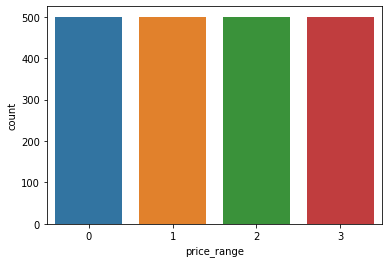

In [103]:
sns.countplot(train['price_range'])

## Exploración de los Datos

#### Gráficos exploratorios

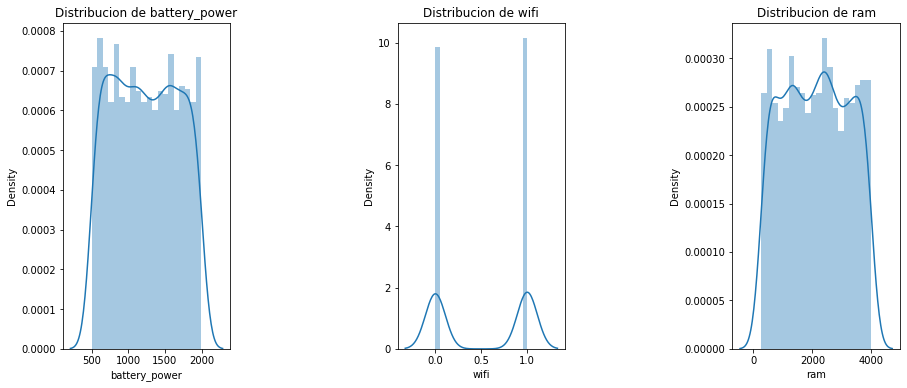

In [91]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['battery_power' , 'wifi' , 'ram']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =1 , wspace = 1)
    sns.distplot(train[x] , bins = 20)
    plt.title('Distribucion de {}'.format(x))
plt.show()

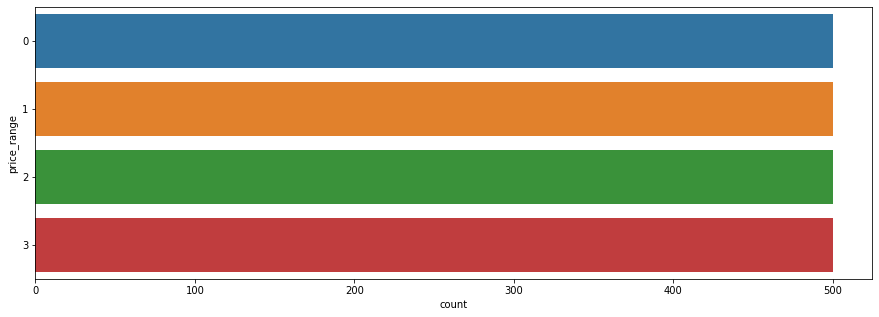

In [92]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'price_range' , data = train)
plt.show()

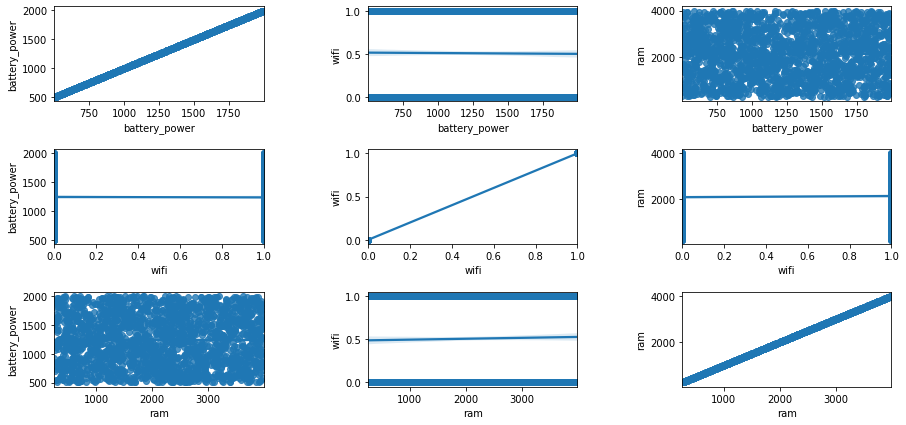

In [93]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['battery_power' , 'wifi' , 'ram']:
    for y in ['battery_power' , 'wifi' , 'ram']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = train)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Text(0.5, 1.0, 'Distribucion de los nucleos de los celulares')

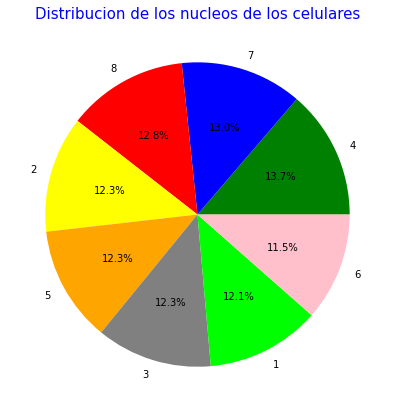

In [104]:
labels = train.n_cores.value_counts().index
colors = ['green','blue','red','yellow','orange','gray','lime','pink']
explode = [0,0,0,0,0,0,0,0,]
sizes = train.n_cores.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribucion de los nucleos de los celulares',color = 'blue',fontsize = 15)

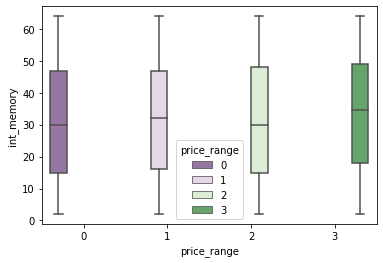

In [105]:
sns.boxplot(x="price_range", y="int_memory", hue="price_range", data=train, palette="PRGn")
plt.show()

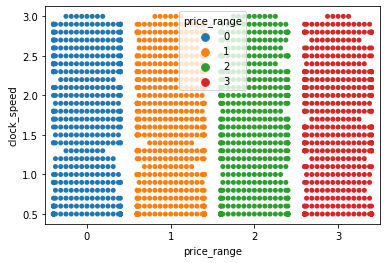

In [106]:
sns.swarmplot(x="price_range", y="clock_speed",hue="price_range", data=train)
plt.show()

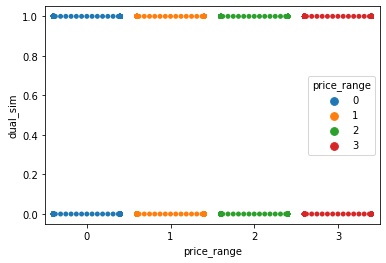

In [107]:
sns.swarmplot(x="price_range", y="dual_sim",hue="price_range", data=train)
plt.show()

Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:

In [108]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory",
                                               "m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w",
                                               "talk_time","three_g","touch_screen","wifi"]],train[["price_range"]], test_size=0.3, random_state=1234)

>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [56]:
print("Entrenamiento dimensiones",X_train.shape)
print("Descripción")
X_train.describe

Entrenamiento dimensiones (1400, 20)
Descripción


<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1249            504     1          2.8         1   2       0          54   
652            1462     1          1.7         1   1       0          25   
238            1330     0          0.5         0   0       0          38   
697            1567     0          0.5         1   3       0          22   
1618            502     0          0.8         0   7       0          52   
...             ...   ...          ...       ...  ..     ...         ...   
1228           1820     1          1.7         1   0       1          64   
1077           1569     0          0.8         1   8       0          59   
1318           1275     1          0.5         1   3       1           5   
723            1271     0          0.5         1   2       0          54   
815            1512     1          0.5         0   1       0          52   

      m_dep  mobile_wt  n_cores  pc  px_height  px_wi

In [58]:
print("Pruebas dimensiones",X_test.shape)
print("Descripción")
X_test.describe

Pruebas dimensiones (600, 20)
Descripción


<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1748            936     1          2.3         0   5       1          57   
934             553     0          0.5         1   2       1          23   
1033           1632     1          1.4         0   0       0          41   
243            1918     0          1.9         0   2       0          10   
928            1349     1          2.2         1   5       0          55   
...             ...   ...          ...       ...  ..     ...         ...   
1016            551     1          2.8         0   0       1          54   
894            1497     1          0.7         0   5       0          32   
305            1348     0          2.0         0  18       0          52   
272            1053     1          0.8         1   7       1          45   
1429           1581     1          1.0         0   9       0          41   

      m_dep  mobile_wt  n_cores  pc  px_height  px_wi

## Modelo de Machine Learning

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [59]:
#-------------- 
# kernel SVM 
#--------------
classifier1 = SVC(kernel="rbf",C=1.0,probability=True)

In [60]:
# Entrenamos nuestro modelo
classifier1.fit(X_train, y_train)

c:\users\efren\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True)

In [113]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred1 = classifier1.predict( X_test )

In [114]:
y_pred1

array([1, 2, 3, 2, 2, 2, 1, 3, 1, 3, 3, 3, 0, 2, 3, 0, 3, 3, 2, 2, 0, 1,
       1, 0, 3, 2, 0, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 2,
       1, 0, 2, 2, 0, 3, 3, 0, 1, 2, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       0, 3, 3, 3, 0, 3, 1, 3, 1, 2, 1, 2, 3, 3, 3, 2, 1, 0, 2, 3, 2, 3,
       3, 1, 1, 2, 0, 1, 3, 0, 1, 3, 2, 2, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       2, 2, 0, 1, 2, 3, 3, 2, 2, 1, 1, 0, 1, 2, 3, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 3, 0, 2, 0, 2, 0, 0, 3, 0, 3,
       1, 3, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 3, 1, 1, 3, 1,
       3, 0, 2, 2, 3, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 2, 3, 3, 0, 2, 1, 3, 3, 1, 3, 0, 0, 3, 1, 2, 3, 3, 2, 3, 3,
       3, 2, 0, 3, 0, 3, 1, 0, 2, 3, 0, 0, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       2, 0, 1, 3, 3, 2, 3, 1, 1, 3, 1, 3, 2, 0, 2, 1, 0, 2, 3, 1, 0, 0,
       0, 0, 1, 3, 2, 2, 1, 0, 3, 0, 0, 2, 3, 0, 3, 3, 1, 1, 3, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 3, 3,

In [63]:
predict_values=classifier1.predict_proba(X_test)
predict_values[:, 1]

array([9.96316443e-01, 9.48130247e-04, 7.76915180e-03, 2.08355262e-02,
       1.67014260e-03, 1.77216812e-03, 8.83534815e-01, 1.04866069e-07,
       9.89132440e-01, 8.08711671e-07, 2.14636416e-07, 2.30133326e-03,
       1.42708636e-02, 2.92878342e-03, 1.96362383e-07, 1.83597177e-07,
       3.29367021e-07, 1.00708125e-02, 2.03550927e-02, 6.39436769e-02,
       1.41040206e-07, 9.72758819e-01, 7.32335229e-01, 4.84533235e-07,
       2.48637560e-03, 1.30237992e-02, 2.49111043e-02, 5.15150634e-08,
       9.94060000e-01, 6.76819478e-02, 6.23940311e-07, 4.20794367e-06,
       5.26627306e-04, 3.67784827e-07, 3.55580561e-04, 2.45430267e-04,
       1.16681226e-03, 2.79812345e-04, 9.96067631e-03, 1.26079950e-03,
       4.37630620e-04, 7.05471835e-01, 1.11613952e-06, 4.65992141e-03,
       9.07211873e-01, 2.44405711e-03, 1.56135086e-02, 1.51654955e-06,
       4.77811411e-04, 7.53384630e-04, 3.86728721e-04, 2.39553766e-03,
       8.59097278e-01, 4.18511617e-03, 9.91748868e-01, 9.46791159e-04,
      

In [ ]:
## Evaluación

In [71]:
np.array(y_pred1)

array([1, 2, 3, 2, 2, 2, 1, 3, 1, 3, 3, 3, 0, 2, 3, 0, 3, 3, 2, 2, 0, 1,
       1, 0, 3, 2, 0, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 2,
       1, 0, 2, 2, 0, 3, 3, 0, 1, 2, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       0, 3, 3, 3, 0, 3, 1, 3, 1, 2, 1, 2, 3, 3, 3, 2, 1, 0, 2, 3, 2, 3,
       3, 1, 1, 2, 0, 1, 3, 0, 1, 3, 2, 2, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       2, 2, 0, 1, 2, 3, 3, 2, 2, 1, 1, 0, 1, 2, 3, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 3, 0, 2, 0, 2, 0, 0, 3, 0, 3,
       1, 3, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 3, 1, 1, 3, 1,
       3, 0, 2, 2, 3, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 2, 3, 3, 0, 2, 1, 3, 3, 1, 3, 0, 0, 3, 1, 2, 3, 3, 2, 3, 3,
       3, 2, 0, 3, 0, 3, 1, 0, 2, 3, 0, 0, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       2, 0, 1, 3, 3, 2, 3, 1, 1, 3, 1, 3, 2, 0, 2, 1, 0, 2, 3, 1, 0, 0,
       0, 0, 1, 3, 2, 2, 1, 0, 3, 0, 0, 2, 3, 0, 3, 3, 1, 1, 3, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 3, 3,

In [115]:
matrix=confusion_matrix(np.array(y_test), np.array(y_pred1))
matrix

array([[136,   0,   0,   0],
       [  4, 146,   4,   0],
       [  0,   9, 132,   9],
       [  0,   0,   4, 156]], dtype=int64)

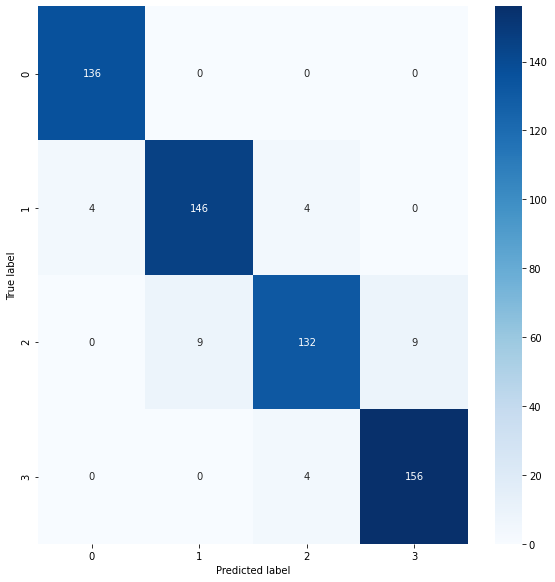

In [116]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,fmt='g', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [117]:
scoresSVC = cross_val_score( classifier1, X_test, y_test, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on model Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

scoresSVC = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))
classifier1.score(X_train, y_train)

Mean kernel-SVM CrossVal Accuracy on model Set 0.94, with std=0.03
Mean kernel-SVM CrossVal Accuracy on Train Set 0.95, with std=0.02


0.955

In [89]:
y_pred_testing = classifier1.predict(test[["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory",
                                               "m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w",
                                               "talk_time","three_g","touch_screen","wifi"]] )

In [90]:
y_pred_testing 

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## Resultados
En conclusión, los valores obtenidos por la clasifición verdaderos positivos son buenos. Por lo cual se recomienda utilizar este modelo de machine learning.

El resultado fue el siguiente: 94% de probabilidad de clasificar correctamente el rango de precio de los celulares